Import Dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset

In [9]:
# Original dataset (DO NOT modify)
file_path = "../../data/RHESSI_SolarFlares_SolarCycle24_Task3_2025.csv"

df = pd.read_csv(file_path, sep=';')
print(f"Original dataset shape: {df.shape}")
df.head()

Original dataset shape: (60205, 17)


,flare_id,date,start_time,peak_time,end_time,duration,peak_counts_per_sec,total_counts,energy_band,x_pos,y_pos,radial,AR,flags,SESC_sunspot_number,sunspot_area,class_str
0,8010115,1-Jan-08,0:05:08,0:06:02,0:06:36,88,32,13906,6-12,-979,-127,987,980,A0 EE P1 Q1,NaN,NaN,NF
1,8010116,1-Jan-08,0:43:12,0:45:02,0:56:44,812,100,125653,6-12,-977,-121,985,980,A0 ES P1 Q1,NaN,NaN,NF
2,8010118,1-Jan-08,1:38:00,1:40:10,1:42:28,268,32,42232,6-12,-977,-134,986,980,A0 EE P1 Q1,NaN,NaN,NF
3,8010135,1-Jan-08,2:19:04,2:19:10,2:22:44,220,63,48085,6-12,-997,-148,1008,980,A0 ES P1 Q1,NaN,NaN,NF
4,8010136,1-Jan-08,2:43:16,2:43:42,2:45:00,104,25,13275,6-12,-966,-164,980,980,A0 DR P1 Q1,NaN,NaN,NF


In [11]:
df.columns.tolist()

['flare_id',
 'date',
 'start_time',
 'peak_time',
 'end_time',
 'duration',
 'peak_counts_per_sec',
 'total_counts',
 'energy_band',
 'x_pos',
 'y_pos',
 'radial',
 'AR',
 'flags',
 'SESC_sunspot_number',
 'sunspot_area',
 'class_str']

# 2. Data Cleaning - Remove invalid rows
###    (a) Remove rows with zero position and energy range 3–6 keV

In [12]:
if 'energy_band' not in df.columns:
    print("Adjust column names if necessary.")
    print("Columns available:", df.columns.tolist())

# Use lowercase column names for x_pos and y_pos
df_clean = df[(df['x_pos'] != 0) & (df['y_pos'] != 0) & (df['energy_band'] != '3-6')]
print(f"After cleaning: {df_clean.shape[0]} rows remain")

After cleaning: 57997 rows remain


# 3. Median duration for each solar flare class

In [13]:
median_duration = df_clean.groupby('class_str')['duration'].median().sort_index()
print("\n(b) Median Duration (seconds) per Class:\n", median_duration)


(b) Median Duration (seconds) per Class:
 class_str
C      860.0
M     1196.0
NF     404.0
X     1228.0
Name: duration, dtype: float64


# 4. Average total counts per flare class

In [14]:
avg_counts_class = df_clean.groupby('class_str')['total_counts'].mean().sort_index()
print("\n(c) Average Total Counts per Class:\n", avg_counts_class)


(c) Average Total Counts per Class:
 class_str
C     5.045063e+06
M     6.242827e+07
NF    1.420111e+06
X     6.010525e+07
Name: total_counts, dtype: float64


# 5. Average total counts per year + most active year(s)


In [20]:
df_clean.loc[:, 'date'] = pd.to_datetime(df_clean['date'], format="%d-%b-%y", errors='coerce')
df_clean.loc[:, 'year'] = df_clean['date'].dt.year

avg_counts_year = df_clean.groupby('year')['total_counts'].mean()
most_active_year = avg_counts_year.idxmax()

print("\n(d) Average Total Counts per Year:\n", avg_counts_year)
print(f"\nMost Active Year: {most_active_year}")


(d) Average Total Counts per Year:
 year
2008    1.073087e+06
2009    2.265871e+05
2010    5.738175e+05
2011    2.336275e+06
2012    1.824381e+06
2013    1.757042e+06
2014    3.076061e+06
2015    1.971423e+06
2016    4.214034e+05
2017    4.082639e+06
2018    8.245296e+04
Name: total_counts, dtype: float64

Most Active Year: 2017


# 6. Most active month(s) during most active year



(e) Average Total Counts per Month (in most active year):
 month
1     9.634852e+05
2     4.183329e+05
3     4.105333e+05
4     4.494809e+06
5     3.122717e+06
6     6.977757e+05
7     2.884163e+06
8     1.941198e+06
9     1.141240e+07
10    1.644805e+06
11    2.050775e+06
12    6.390165e+05
Name: total_counts, dtype: float64

Most Active Month in 2017: 9


C:\Users\diana\AppData\Local\Temp\ipykernel_29600\744344964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_year_df['month'] = active_year_df['date'].dt.month


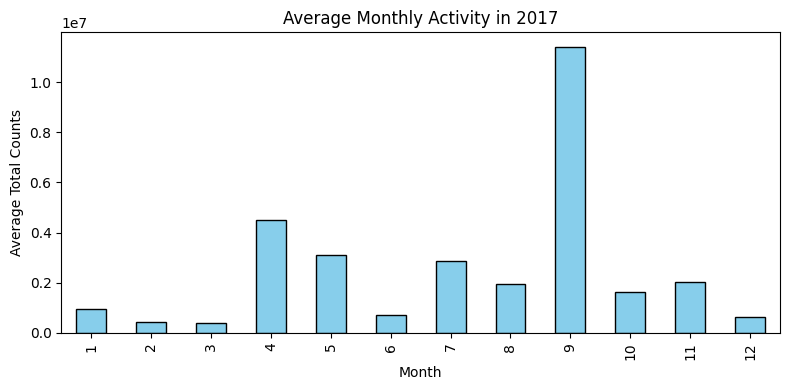

In [21]:
active_year_df = df_clean[df_clean['year'] == most_active_year]
active_year_df['month'] = active_year_df['date'].dt.month
avg_counts_month = active_year_df.groupby('month')['total_counts'].mean()
most_active_month = avg_counts_month.idxmax()
print("\n(e) Average Total Counts per Month (in most active year):\n", avg_counts_month)
print(f"\nMost Active Month in {most_active_year}: {most_active_month}")

# Visual: Monthly activity in most active year
plt.figure(figsize=(8,4))
avg_counts_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Average Monthly Activity in {most_active_year}")
plt.xlabel("Month")
plt.ylabel("Average Total Counts")
plt.tight_layout()
plt.savefig("visuals/avg_counts_per_month.png")
plt.show()

# 7. Flags mostly present in each flare class


In [22]:
if 'flags' in df_clean.columns:
    dominant_flags = df_clean.groupby('class_str')['flags'].agg(lambda x: x.value_counts().index[0])
    print("\n(f) Most Common Flag per Flare Class:\n", dominant_flags)
else:
    print("\n(f) 'flags' column not found in dataset. Skipping this step.")


(f) Most Common Flag per Flare Class:
 class_str
C           A0 DR ES P1 PE Q3
M     a0 A1 DF DR ES P1 PE Q4
NF                A0 P1 PE Q1
X           A0 DF DR P1 PE Q3
Name: flags, dtype: object


# 8. Feature Engineering (add useful columns)

In [24]:
# (g) Add duration in minutes and flare intensity proxy safely
df_clean = df_clean.copy()  # ensures we're working on a full copy

df_clean.loc[:, 'duration_min'] = df_clean['duration'] / 60
df_clean.loc[:, 'flare_intensity'] = df_clean['total_counts'] / (df_clean['duration'] + 1)
df_clean.loc[:, 'month'] = df_clean['date'].dt.month

# Drop any unnecessary columns if present
cols_to_drop = ['Unnamed: 0']
df_clean = df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns])

print("\n(g) Added new columns: duration_min, flare_intensity, month")
print("Final dataset shape:", df_clean.shape)


(g) Added new columns: duration_min, flare_intensity, month
Final dataset shape: (57997, 21)


# 9. Save Cleaned Dataset


In [25]:
output_path = "../../data/cleaned_solarflare_dataset.csv"
df_clean.to_csv(output_path, index=False)
print(f"\n✅ Cleaned dataset saved to: {output_path}")


✅ Cleaned dataset saved to: ../../data/cleaned_solarflare_dataset.csv


# 10. Quick Summary

In [26]:
summary = {
    "Total Flares (after cleaning)": len(df_clean),
    "Most Active Year": int(most_active_year),
    "Most Active Month": int(most_active_month),
    "Classes Analyzed": list(df_clean['class_str'].unique())
}
print("\n=== Activity 1 Summary ===")
for k, v in summary.items():
    print(f"{k}: {v}")


=== Activity 1 Summary ===
Total Flares (after cleaning): 57997
Most Active Year: 2017
Most Active Month: 9
Classes Analyzed: ['NF', 'C', 'M', 'X']


# Check New Dataset

In [28]:
df = pd.read_csv("../../data/cleaned_solarflare_dataset.csv")
df.head()
# df.shape

,flare_id,date,start_time,peak_time,end_time,duration,peak_counts_per_sec,total_counts,energy_band,x_pos,...,radial,AR,flags,SESC_sunspot_number,sunspot_area,class_str,year,duration_min,flare_intensity,month
0,8010115,2008-01-01,0:05:08,0:06:02,0:06:36,88,32,13906,6-12,-979,...,987,980,A0 EE P1 Q1,NaN,NaN,NF,2008,1.466667,156.247191,1
1,8010116,2008-01-01,0:43:12,0:45:02,0:56:44,812,100,125653,6-12,-977,...,985,980,A0 ES P1 Q1,NaN,NaN,NF,2008,13.533333,154.554736,1
2,8010118,2008-01-01,1:38:00,1:40:10,1:42:28,268,32,42232,6-12,-977,...,986,980,A0 EE P1 Q1,NaN,NaN,NF,2008,4.466667,156.996283,1
3,8010135,2008-01-01,2:19:04,2:19:10,2:22:44,220,63,48085,6-12,-997,...,1008,980,A0 ES P1 Q1,NaN,NaN,NF,2008,3.666667,217.579186,1
4,8010136,2008-01-01,2:43:16,2:43:42,2:45:00,104,25,13275,6-12,-966,...,980,980,A0 DR P1 Q1,NaN,NaN,NF,2008,1.733333,126.428571,1
